<h1>
<center>CFRM 421/5213</center>
</h1>

<h1>
<center>ziwen chen</center>
</h1>

<h1>
<center>Homework 3</center>
</h1>

* **Due: Tuesday, May 13, 2025, 11:59 PM**


* Total marks: 38


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. Applying PCA [6 marks]

## (a) [4 marks]
Train a SVM classifier with a Gaussian RBF kernel on the MNIST training data (the first 60,000 observations). Use the default arguments for the classifier. Take the first 10,000 observations as the training set given by `X_train_red` and `y_train_red` in the code below. Time your training using `%time` and report the accuracy of the trained model on the test set (the last 10,000 observations of MNIST). Now, use PCA on the original training set (60,0000 observations) to find principal components with an explained variance ratio of 60%. Retrain the SVM classifier using these principal components instead of the original features. Time the training and accuracy on the test set. Comment on whether PCA helped or not. Do not shuffle the data and do not use a standard scaler.

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, cache=True)
mnist.target = mnist.target.astype(np.int8)
X_train = mnist["data"][:60000]
X_test  = mnist["data"][60000:]
y_train = mnist["target"][:60000]
y_test  = mnist["target"][60000:]
X_train_red = mnist["data"][:10000]
y_train_red = mnist["target"][:10000]

**[Add your solution here]**

In [2]:
from sklearn.svm import SVC

In [3]:
# train on the first 60,000 observations
rbf_svc = SVC(kernel='rbf')
%time rbf_svc.fit(X_train, y_train)

CPU times: user 2min 8s, sys: 604 ms, total: 2min 9s
Wall time: 2min 9s


SVC()

In [4]:
%time acc_svc_full = rbf_svc.score(X_test, y_test)
print(f"accuracy {acc_svc_full}")

CPU times: user 29.9 s, sys: 59 ms, total: 29.9 s
Wall time: 30 s
accuracy 0.9792


In [5]:
# train on the first 10,000 observations
rbf_svc_red = SVC(kernel='rbf')
%time rbf_svc_red.fit(X_train_red, y_train_red)

CPU times: user 3.98 s, sys: 19.8 ms, total: 4 s
Wall time: 4 s


SVC()

In [6]:
%time acc_svc_red = rbf_svc_red.score(X_test, y_test)
print(f"accuracy {acc_svc_red}")

CPU times: user 9.25 s, sys: 20.1 ms, total: 9.27 s
Wall time: 9.28 s
accuracy 0.9594


In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum > 0.6) + 1
print(f"{n_components} are needed to preserve 60% of explained variance")

17 are needed to preserve 60% of explained variance


In [8]:
# train with full dataset, but with only 17 pcs.
pca_17 = PCA(n_components=n_components)
X_train_reduced = pca_17.fit_transform(X_train)
X_test_reduced = pca_17.transform(X_test)
print(X_train_reduced.shape, X_test_reduced.shape)

(60000, 17) (10000, 17)


In [9]:
rbf_svc_17pc = SVC(kernel='rbf')
%time rbf_svc_17pc.fit(X_train_reduced, y_train)

CPU times: user 4.61 s, sys: 114 ms, total: 4.73 s
Wall time: 4.73 s


SVC()

In [10]:
%time acc_svc_reduced = rbf_svc_17pc.score(X_test_reduced, y_test)
print(f"accuracy {acc_svc_reduced}")

CPU times: user 3.61 s, sys: 8.84 ms, total: 3.61 s
Wall time: 3.62 s
accuracy 0.9723


***The PCA helped a lot.*** Comparing the three results, with only 17 features, SVC can achieve 0.9723 accuracy on the test set, and its training time is the fastest comparing others.

## (b) [2 marks]

Repeat (a) using a random forest classifier instead of the SVM classifier and comment on the result. Use `random_state=42` in the classifier and use the default for the other arguments. You are allowed to use `n_jobs=-1`.

**[Add your solution here]**

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rdc_full = RandomForestClassifier(random_state=42, n_jobs=-1)
%time rdc_full.fit(X_train, y_train)

CPU times: user 26.5 s, sys: 237 ms, total: 26.7 s
Wall time: 1.98 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [13]:
%time acc_rdc_full = rdc_full.score(X_test, y_test)
print(f"accuracy {acc_rdc_full}")

CPU times: user 154 ms, sys: 17 ms, total: 171 ms
Wall time: 39.4 ms
accuracy 0.9691


In [14]:
rdc_red = RandomForestClassifier(random_state=42, n_jobs=-1)
%time rdc_red.fit(X_train_red, y_train_red)

CPU times: user 3.22 s, sys: 46.6 ms, total: 3.27 s
Wall time: 279 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [15]:
%time acc_rdc_red = rdc_red.score(X_test, y_test)
print(f"accuracy {acc_rdc_red}")

CPU times: user 102 ms, sys: 16.4 ms, total: 119 ms
Wall time: 35.4 ms
accuracy 0.95


In [16]:
rdc_17pc = RandomForestClassifier(random_state=42, n_jobs=-1)
%time rdc_17pc.fit(X_train_reduced, y_train)

CPU times: user 27.3 s, sys: 134 ms, total: 27.4 s
Wall time: 2.02 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [17]:
%time acc_rdc_17pc = rdc_17pc.score(X_test_reduced, y_test)
print(f"accuracy {acc_rdc_17pc}")

CPU times: user 119 ms, sys: 13.9 ms, total: 133 ms
Wall time: 28.4 ms
accuracy 0.9444


***PCA did not help***, it's accuracy becomes lower and even used more time than training on the full dimension. This is probably due to the inner structure of tree.

# 2. Visualizing dimensionality reduction [8 marks]

## (a) [3 marks]
Load the MNIST dataset and take only the first 5,000 observations as `X` and `y`. Use the nonlinear dimensionality reduction technique **t-SNE** to reduce this subset of the MNIST dataset down to 2 dimensions. Include the argument `random_state=42`. Measure how long it took to reduce the dimensionality, this will be used in (b) below. Plot a scatterplot of the outcome of t-SNE. Use 10 different colors to represent each image's target class and plot scaled-down versions of the digit images themselves. The visualization will be too cluttered if you draw the image for every observation, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance. You should get a nice visualization of different classes and some of the digit images in them. See the textbook's Jupyter notebook for the code. Use the plot to comment on which classes are easily identified and which ones can be hard to distinguish.

Hint: See the solution of Chapter 8, Question 10 in this [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb) on the textbook website to see how to implement t-SNE and produce these plots using the `plot_digits()` function.

**[Add your solution here]**

In [50]:
from sklearn.manifold import TSNE

X_5k = mnist['data'][:5000]
y_5k = mnist['target'][:5000]

tsne = TSNE(n_components=2, random_state=42) # init="random", learning_rate="auto",

%time X_reduced_tsne = tsne.fit_transform(X_5k)

CPU times: user 44.8 s, sys: 43.1 s, total: 1min 27s
Wall time: 6.05 s


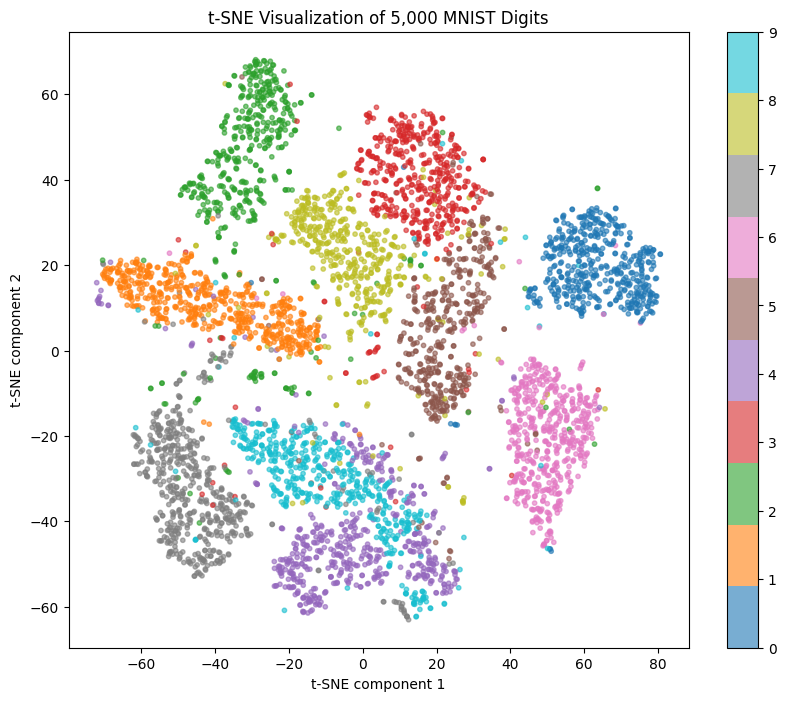

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y_5k, cmap='tab10', s=10, alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title("t-SNE Visualization of 5,000 MNIST Digits")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

***From the plot,*** pair like [9,4], [5,3] are hard to distinguish, others are easy to distinguish

## (b) [5 marks]
Try using other dimensionality reduction methods. Specifically, try:

* Regular PCA to reduce to 2 dimensions.
* LLE to reduce to 2 dimensions.
* First apply PCA with an explained variance ratio of 95%, then apply t-SNE to reduce to 2 dimensions.

For each algorithm, include the argument `random_state=42`. Then for each of the three methods above, report how long it took to reduce the dimension. Also, provide a 2D plot of the results. Which method runs faster? Which one results in a better visualization? Include t-SNE from (a) as part of your comparison.

**[Add your solution here]**

In [20]:
# regular PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
%time X_reduced_pca = pca.fit_transform(X_5k)

CPU times: user 29.3 ms, sys: 14.9 ms, total: 44.2 ms
Wall time: 38.8 ms


In [21]:
# LLE
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_reduced_lle = lle.fit_transform(X_5k)

CPU times: user 3.62 s, sys: 1.37 s, total: 4.98 s
Wall time: 939 ms


In [48]:
pca_tsne = PCA(random_state=42)
%time pca_tsne.fit_transform(X_5k)
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum > 0.95) + 1
pca_tsne = PCA(n_components=n_components, random_state=42)
%time X_reduced_pca_tsne = pca_tsne.fit_transform(X_5k)

tsne_pca = TSNE(n_components=2, random_state=42) # , init="random", learning_rate="auto",
%time X_reduced_pca_tsne = tsne_pca.fit_transform(X_reduced_pca_tsne)


CPU times: user 207 ms, sys: 37 ms, total: 244 ms
Wall time: 165 ms
CPU times: user 80.2 ms, sys: 21.1 ms, total: 101 ms
Wall time: 68.3 ms
CPU times: user 43 s, sys: 41.3 s, total: 1min 24s
Wall time: 6.23 s


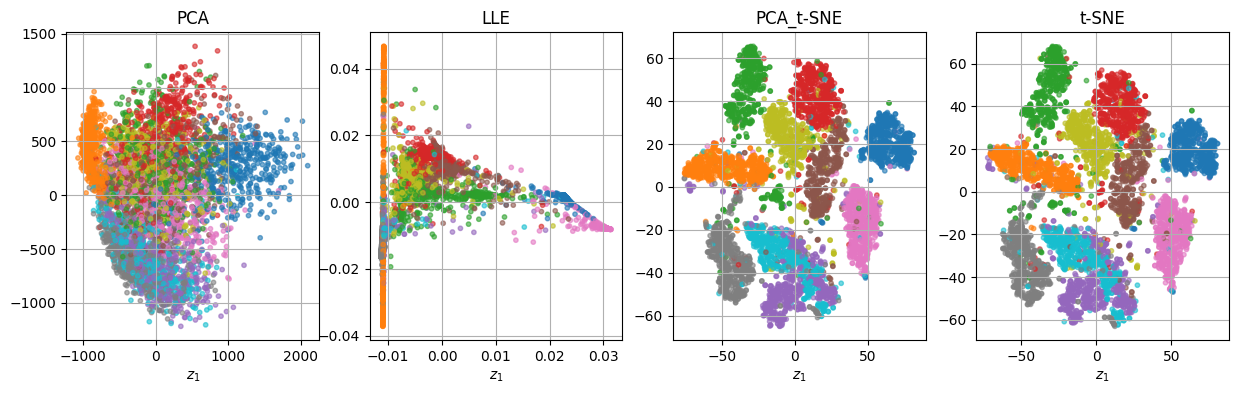

In [52]:
titles = ["PCA", "LLE", "PCA_t-SNE", "t-SNE"]

plt.figure(figsize=(15, 4))

for subplot, title, X_reduced in zip((141, 142, 143, 144), titles,
                                     (X_reduced_pca, X_reduced_lle, X_reduced_pca_tsne, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_5k, cmap='tab10', s=10, alpha=0.6)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

plt.show()

***Based on 4 plots***, PCA runs the faster but with the messiest visualization, the best algorithm is pca first then tsne, which provides the most grouped and organized visualization among the other 3, and it has similar runtime as just tsne.

# 3. k-Means clustering [11 marks]

Hint: It is helpful to read the solution of Chapter 9, Question 10 and 11 in this [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb).

## (a) Chapter 9, Question 10 [6 marks]


The classic Olivetti faces dataset contains 400 grayscale $64\times 64$ pixel images of faces. Each image is flattened to a 1D vector of size 4096. 40 different people were photographed (10 times each), and the task is to train a model that can predict which person is represented in each picture. Load the dataset and split it into a training set and a validation set using the code below. Since the dataset is quite small, stratified sampling is used to ensure that there are the same number of images per person in each set. There is no need to create a test set.

In [24]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_olivetti_faces()
# Creating validation set
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=120, random_state=42)
train_idx, val_idx = next(strat_split.split(data.data, data.target))
X_valid, y_valid = data.data[val_idx], data.target[val_idx]
# Creating training set
X_train, y_train = data.data[train_idx], data.target[train_idx]

Note that the dataset is already scaled between 0 and 1, so there is no need to use a standard scaler. Next, use PCA on the features with an explained variance ratio of 99%. Then cluster the images based on the reduced features using k-Means, where the argument `random_state=42` is included. To determine the number of clusters $k\in\{5,10,15,\dots,145\}$, (i) plot inertia, (ii) plot silhouette scores. Choose the number of clusters $k'$ based on (ii). Then (iii) plot silhouette diagrams where the number of clusters is 40 and $k'$, and explain which number of clusters is better. Finally, suppose we use $k'$ clusters, (iv) visualize the clusters by plotting the images in each cluster and comment on whether you see similar faces in each cluster.

**[Add your solution here]**

In [25]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumsum > 0.99) + 1

pca = PCA(n_components=n_components)
X_train_99 = pca.fit_transform(X_train)

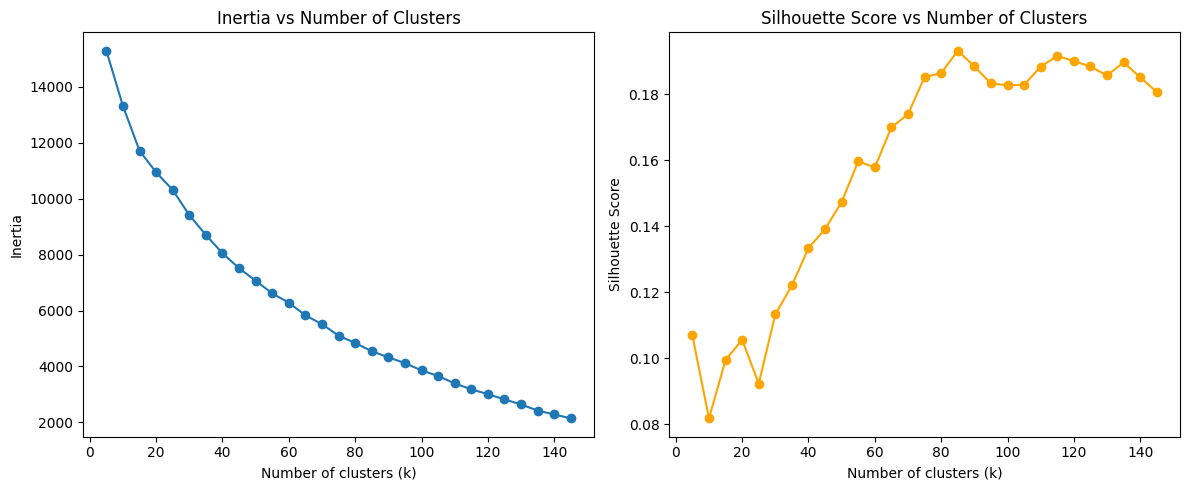

In [26]:
k_list = list(range(5, 145 + 1, 5))
inertias = []
sil_scores = []

for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train_99)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_train_99, labels))

# 绘制 inertia 和 silhouette 分数
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_list, inertias, marker='o')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_list, sil_scores, marker='o', color='orange')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

***No clear elbow***

Best number of clusters (k') based on silhouette score: 85


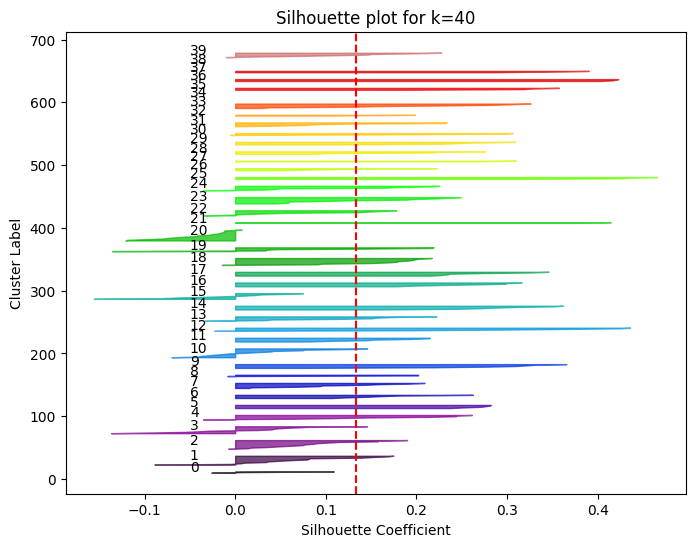

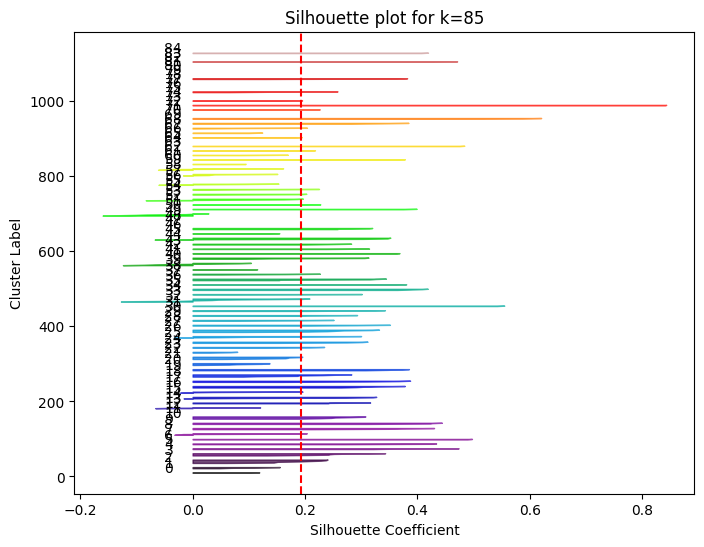

In [27]:
# select the best k through max silhouette score
k_best = k_list[np.argmax(sil_scores)]
print(f"Best number of clusters (k') based on silhouette score: {k_best}")

# 画出 k'=40 和 k_best 的 silhouette 图
def plot_silhouette(X, n_clusters, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_vals = silhouette_samples(X, labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_vals[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for spacing between plots
    ax.set_title(title)
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=silhouette_score(X, labels), color="red", linestyle="--")
    plt.show()

# 画 silhouette 图
plot_silhouette(X_train_99, 40, "Silhouette plot for k=40")
plot_silhouette(X_train_99, k_best, f"Silhouette plot for k={k_best}")

***Through silhuette plot***, I personally think k = 85 (this number varies everytime I rerun this notebook, so here might mismatch what I got) is better as I see more gaps between each cluster label, and there is less negative silhouette score comparing with k = 40

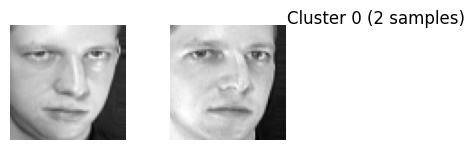

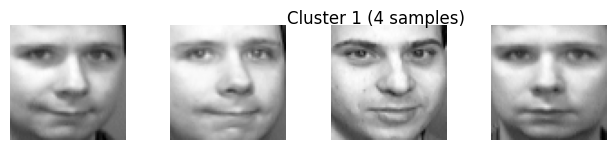

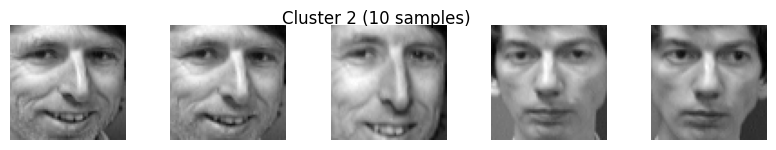

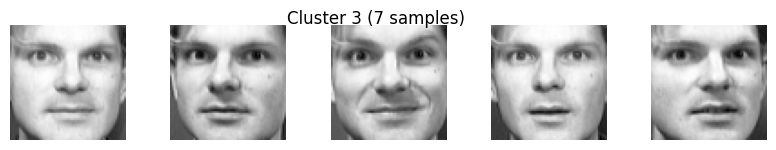

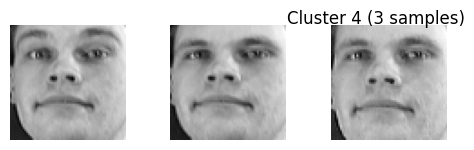

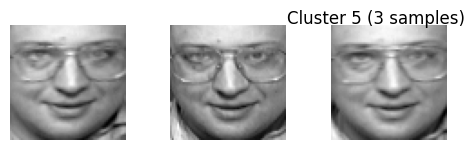

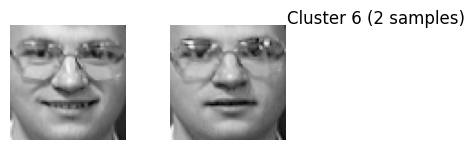

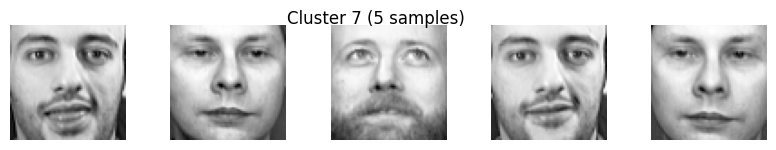

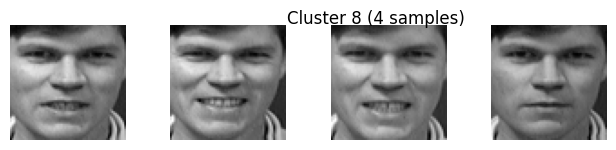

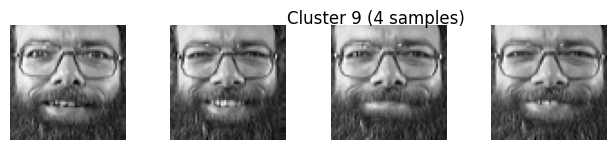

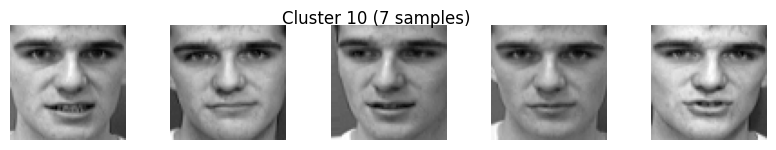

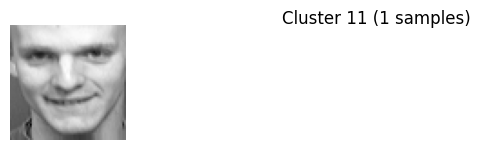

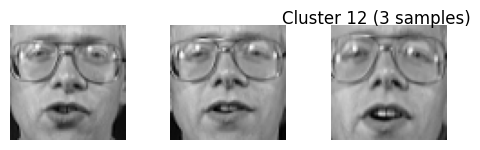

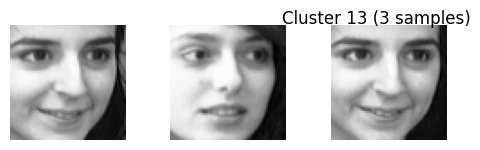

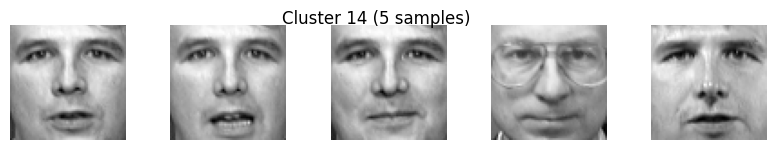

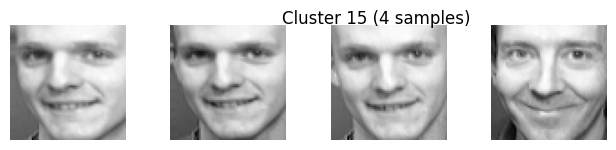

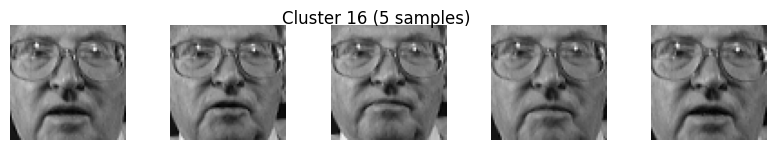

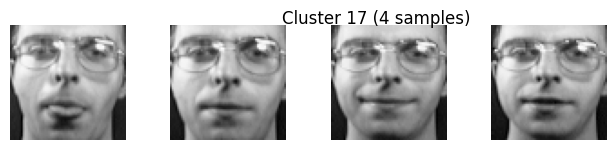

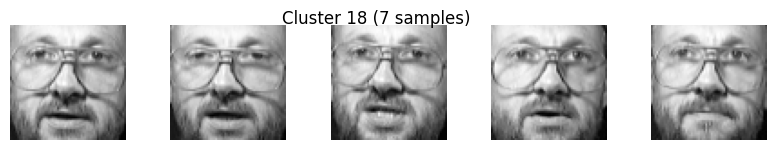

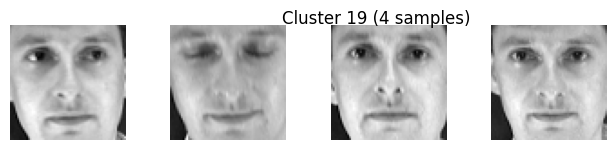

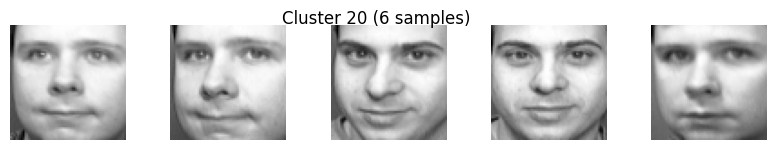

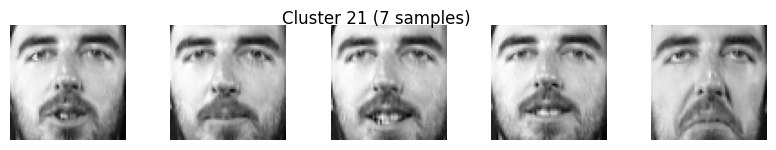

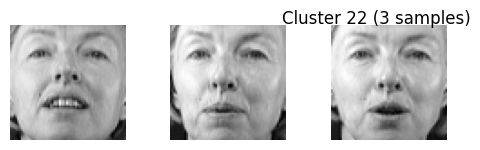

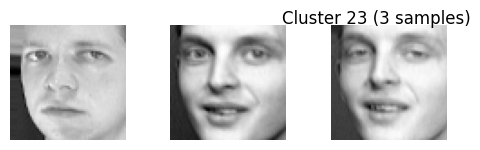

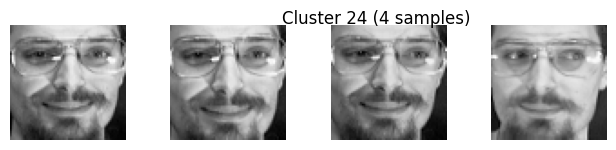

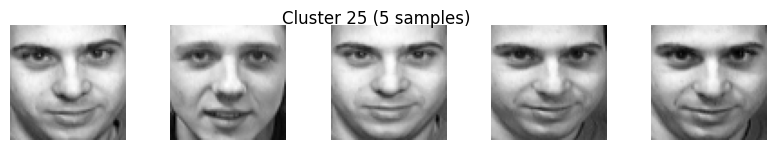

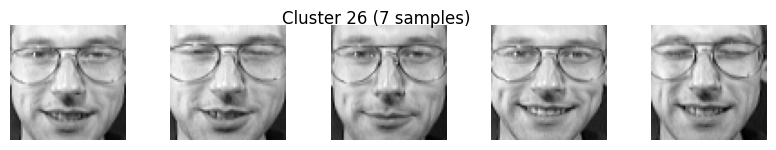

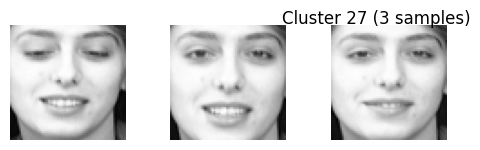

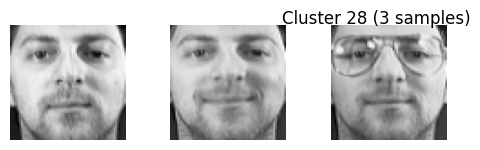

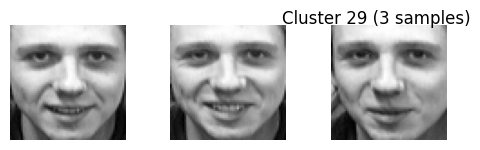

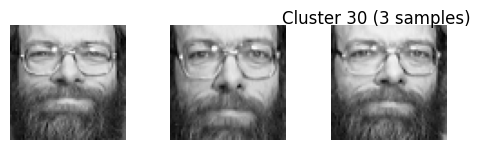

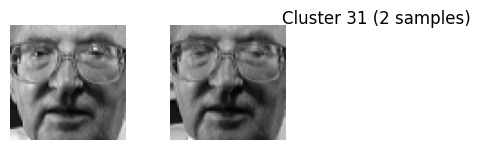

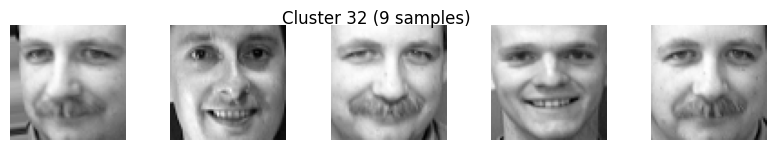

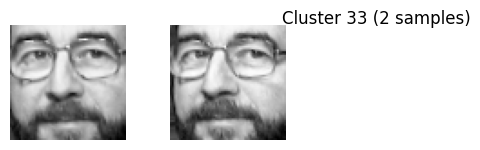

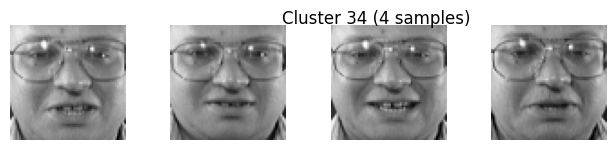

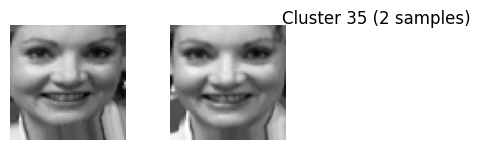

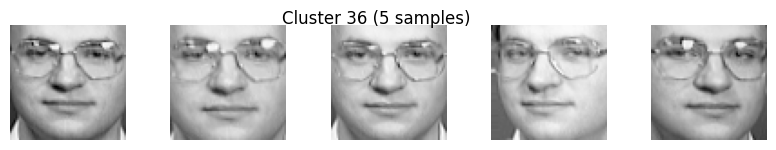

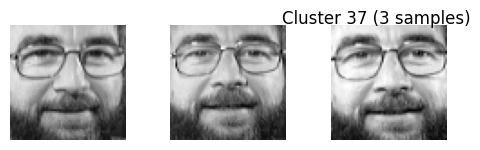

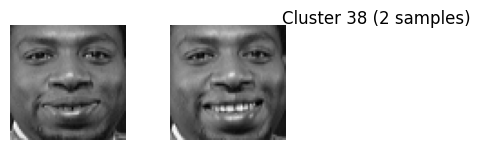

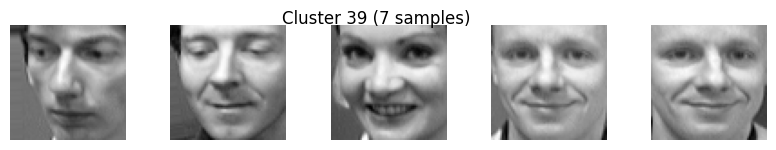

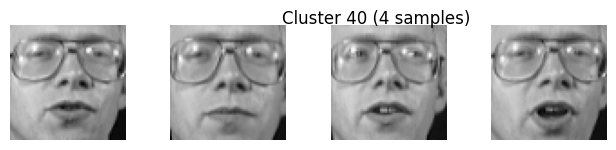

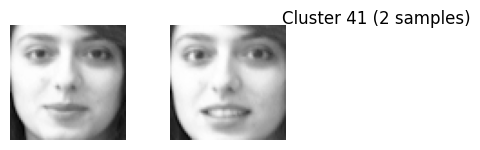

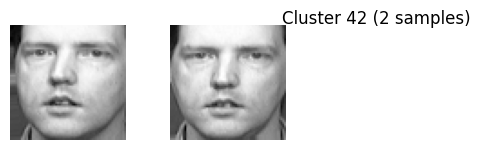

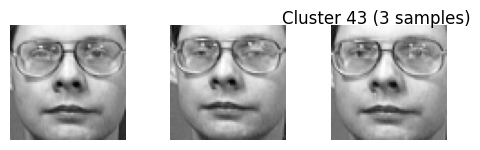

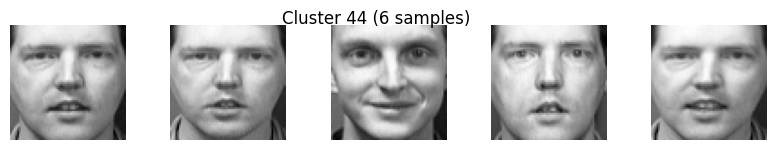

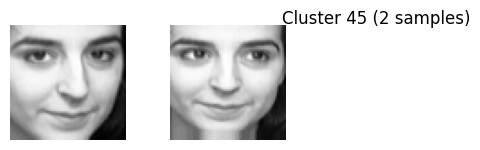

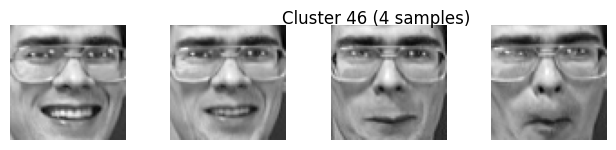

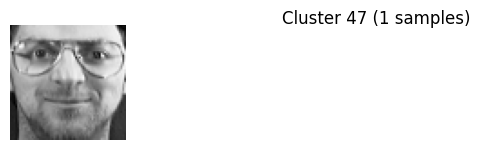

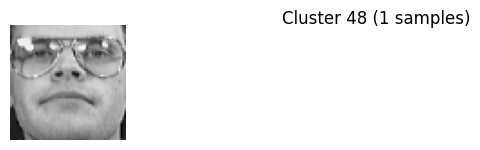

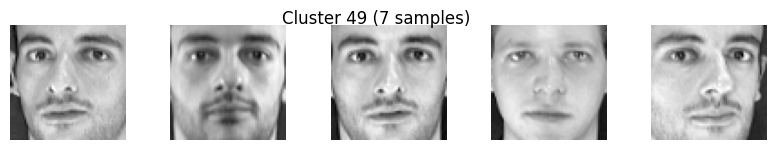

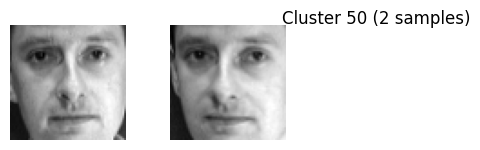

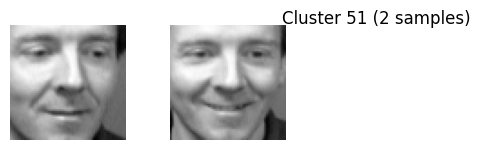

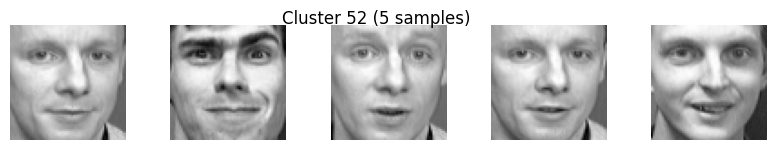

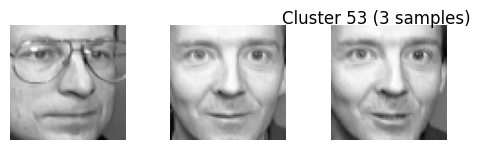

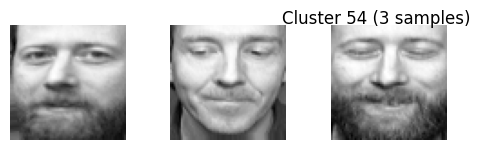

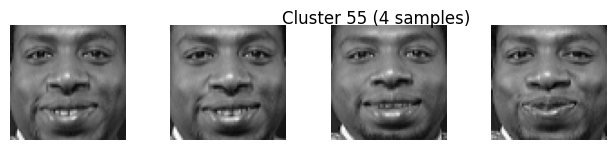

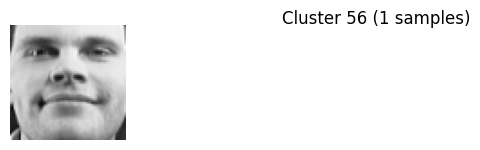

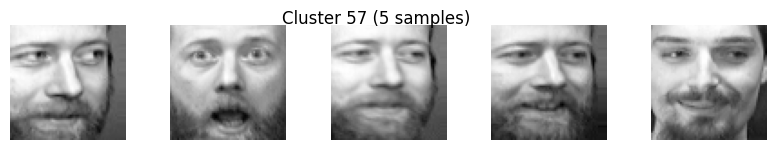

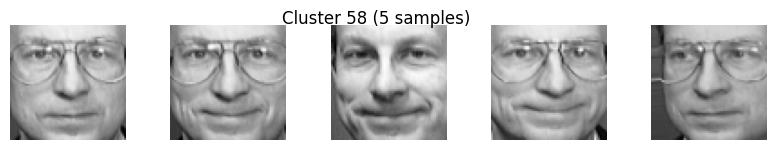

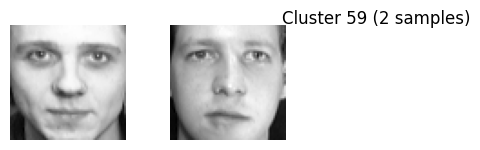

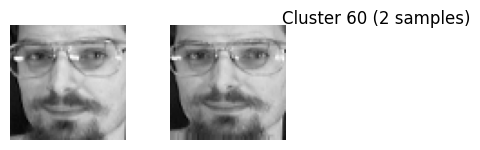

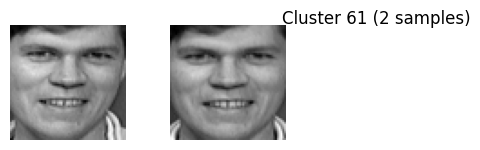

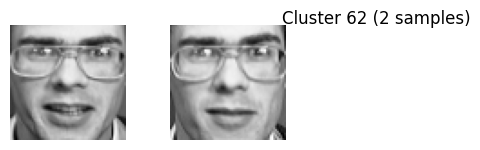

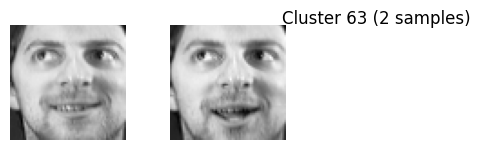

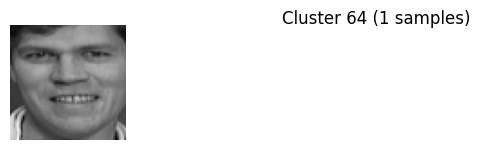

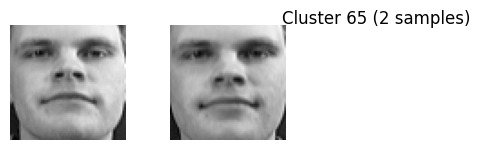

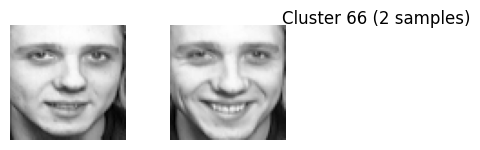

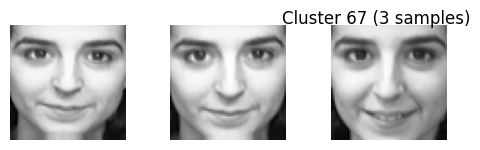

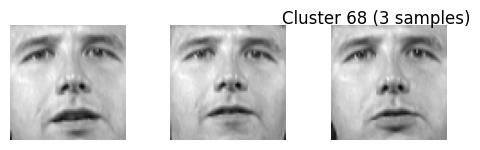

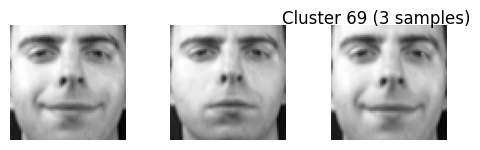

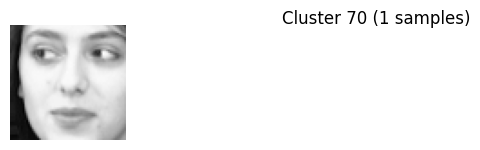

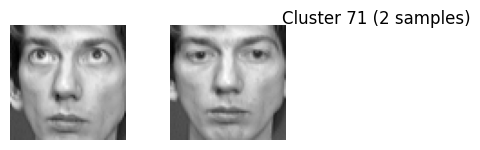

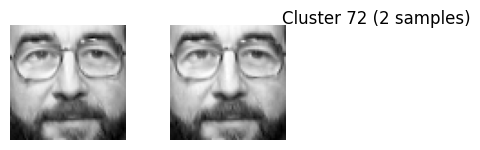

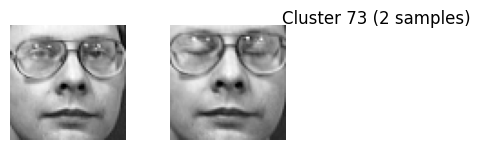

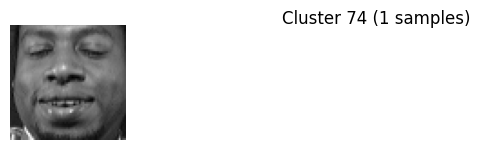

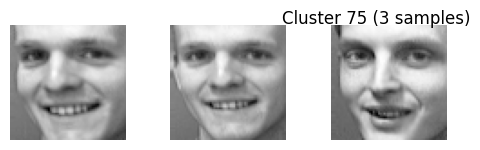

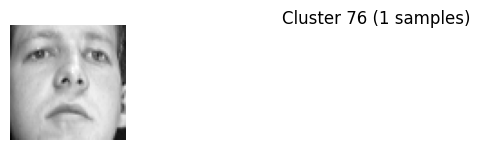

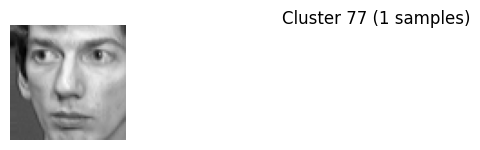

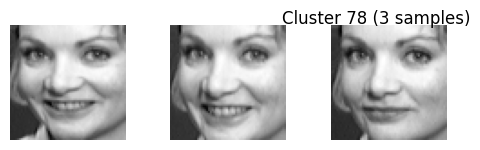

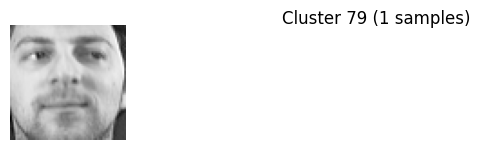

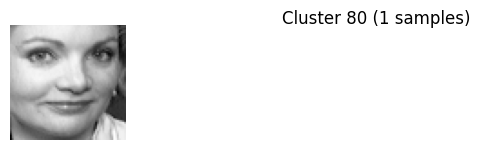

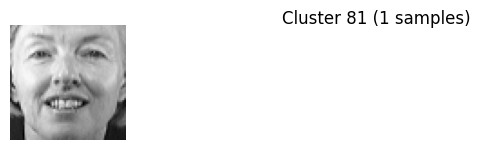

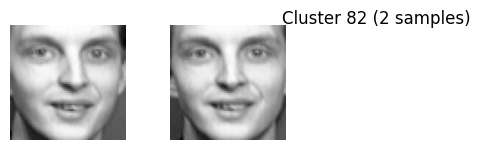

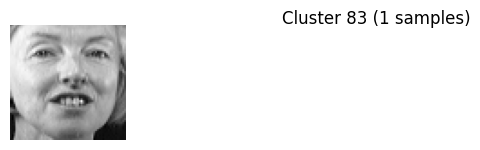

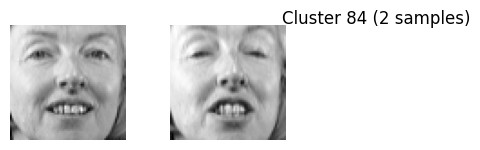

In [28]:
# 最后进行可视化
def visualize_clusters(images_flat, labels, n_clusters, samples_per_cluster=5):
    image_shape = (64, 64)  # Olivetti faces image size
    for cluster_id in range(n_clusters):
        # 找到当前 cluster 中的索引
        cluster_indices = np.where(labels == cluster_id)[0]
        # 只取前 samples_per_cluster 个样本
        selected_indices = cluster_indices[:samples_per_cluster]
        
        # 创建横向子图
        plt.figure(figsize=(10, 1.5))
        for i, idx in enumerate(selected_indices):
            plt.subplot(1, samples_per_cluster, i + 1)
            plt.imshow(images_flat[idx].reshape(image_shape), cmap='gray')
            plt.axis('off')
        plt.suptitle(f"Cluster {cluster_id} ({len(cluster_indices)} samples)")
        plt.show()

# 使用 k_best 进行最终聚类并可视化
final_kmeans = KMeans(n_clusters=k_best, random_state=42)
final_labels = final_kmeans.fit_predict(X_train_99)
visualize_clusters(X_train, final_labels, n_clusters=k_best)

***Each cluster*** has really similar faces.

## (b) [2 marks]

Continue to use the reduced features based on PCA in (a). Train a random forest classifier `RandomForestClassifier(n_estimators=150, random_state=42)` and a histogram-based gradient boosting classifier using `HistGradientBoostingClassifier(max_iter=200, random_state=42, early_stopping=True, validation_fraction=0.2)` to predict which person is represented in each picture, and evaluate it on the validation set. For the gradient boosting classifier state the optimal number of iterations from early stopping. State which of the two models is better.

**[Add your solution here]**

In [29]:
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

rfc = RandomForestClassifier(n_estimators=150, random_state=42)
hgbc = HistGradientBoostingClassifier(max_iter=200, random_state=42, early_stopping=True, validation_fraction=0.2)

rfc.fit(X_train_99, y_train)
hgbc.fit(X_train_99, y_train)

X_valid_99 = pca.transform(X_valid)

y_pred_rfc = rfc.predict(X_valid_99)
y_pred_hgbc = hgbc.predict(X_valid_99)

In [30]:
from sklearn.metrics import accuracy_score

acc_rfc = accuracy_score(y_valid, y_pred_rfc)
acc_hgbc = accuracy_score(y_valid, y_pred_hgbc)

In [31]:
print(f"random forest accuracy:{acc_rfc}, hgbc accuracy:{acc_hgbc}")
print(f"HGB Classifier early stopped at iteration {hgbc.n_iter_}")

random forest accuracy:0.8916666666666667, hgbc accuracy:0.7583333333333333
HGB Classifier early stopped at iteration 84


***Random Forest*** has higher accuracy.

## (c) Chapter 9, Question 11 [4 marks]

Continuing on from (b), regardless of which model is better, use the random forest classifier. Next, use k-Means as a dimensionality reduction tool, and train a classifier. Search for the number of clusters $k\in\{5,10,15,\dots,145\}$ that allows the classifier to get the best performance on the validation set. What performance can you reach on the validation set? What if you append the features from the reduced set to the original features and again search for the best number of clusters?

**[Add your solution here]**

In [32]:
from sklearn.preprocessing import OneHotEncoder

k_list = list(range(5, 145 + 1, 5))
best_score = 0
best_k = None

for k in k_list:
    # 聚类
    kmeans = KMeans(n_clusters=k, random_state=42)
    train_labels = kmeans.fit_predict(X_train_99)
    valid_labels = kmeans.predict(X_valid_99)

    # One-Hot 编码
    onehot_encoder = OneHotEncoder()
    train_labels_oh = onehot_encoder.fit_transform(train_labels.reshape(-1, 1))
    valid_labels_oh = onehot_encoder.transform(valid_labels.reshape(-1, 1))

    # 用聚类 one-hot 特征训练分类器
    clf = RandomForestClassifier(n_estimators=150, random_state=42)
    clf.fit(train_labels_oh, y_train)
    y_pred = clf.predict(valid_labels_oh)

    # 评估准确率
    acc = accuracy_score(y_valid, y_pred)
    print(f"k={k}, validation accuracy={acc:.4f}")

    if acc > best_score:
        best_score = acc
        best_k = k

print(f"\n✅ Best k = {best_k} with validation accuracy = {best_score:.4f}")


k=5, validation accuracy=0.1000
k=10, validation accuracy=0.2000
k=15, validation accuracy=0.2833
k=20, validation accuracy=0.3333
k=25, validation accuracy=0.4500
k=30, validation accuracy=0.4667
k=35, validation accuracy=0.5417
k=40, validation accuracy=0.5333
k=45, validation accuracy=0.5833
k=50, validation accuracy=0.6250
k=55, validation accuracy=0.6833
k=60, validation accuracy=0.7333
k=65, validation accuracy=0.7500
k=70, validation accuracy=0.7833
k=75, validation accuracy=0.7917
k=80, validation accuracy=0.7917
k=85, validation accuracy=0.8167
k=90, validation accuracy=0.8167
k=95, validation accuracy=0.8250
k=100, validation accuracy=0.8333
k=105, validation accuracy=0.8583
k=110, validation accuracy=0.8917
k=115, validation accuracy=0.8833
k=120, validation accuracy=0.8917
k=125, validation accuracy=0.9000
k=130, validation accuracy=0.9000
k=135, validation accuracy=0.9083
k=140, validation accuracy=0.9083
k=145, validation accuracy=0.9083

✅ Best k = 135 with validation ac

In [33]:
# concatenate PCA feature + one-hot cluster feature
from numpy import hstack
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

k_list = list(range(5, 145 + 1, 5))
best_score = 0
best_k = None

for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42)
    train_labels = kmeans.fit_predict(X_train_99).reshape(-1, 1)
    valid_labels = kmeans.predict(X_valid_99).reshape(-1, 1)
    
    encoder = OneHotEncoder()
    train_labels_oh = encoder.fit_transform(train_labels).toarray()
    valid_labels_oh = encoder.transform(valid_labels).toarray()
    
    X_train_combined = hstack([X_train_99, train_labels_oh]) # append to original feature, I assume it is the reduced one
    X_valid_combined = hstack([X_valid_99, valid_labels_oh])
    
    clf = RandomForestClassifier(n_estimators=150, random_state=42)
    clf.fit(X_train_combined, y_train)
    y_pred = clf.predict(X_valid_combined)
    
    acc_combined = accuracy_score(y_valid, y_pred)
    print(f"k={k}, validation accuracy={acc_combined:.4f}")
        
    if acc_combined > best_score:
        best_score = acc_combined
        best_k = k

print(f"\n✅ Best k = {best_k} with validation accuracy = {best_score:.4f}")

k=5, validation accuracy=0.9417
k=10, validation accuracy=0.9333
k=15, validation accuracy=0.9167
k=20, validation accuracy=0.9333
k=25, validation accuracy=0.9167
k=30, validation accuracy=0.9417
k=35, validation accuracy=0.9167
k=40, validation accuracy=0.9333
k=45, validation accuracy=0.9083
k=50, validation accuracy=0.9250
k=55, validation accuracy=0.9250
k=60, validation accuracy=0.9583
k=65, validation accuracy=0.9250
k=70, validation accuracy=0.9417
k=75, validation accuracy=0.9417
k=80, validation accuracy=0.9250
k=85, validation accuracy=0.9417
k=90, validation accuracy=0.9417
k=95, validation accuracy=0.9500
k=100, validation accuracy=0.9167
k=105, validation accuracy=0.9500
k=110, validation accuracy=0.9167
k=115, validation accuracy=0.9167
k=120, validation accuracy=0.9500
k=125, validation accuracy=0.9417
k=130, validation accuracy=0.9417
k=135, validation accuracy=0.9333
k=140, validation accuracy=0.9333
k=145, validation accuracy=0.9167

✅ Best k = 60 with validation acc

***The highest performance*** that I can achieve by training on the one-hot is 0.9 where k = 145. The highest I can achieve by training on the original feature appended with one-hot is 0.9583 where k = 60 (this number varies everytime I rerun the notebook). Here I am a little confused about appending the one-hot feature to the reduced(99% explained variance ratio) or the one kept all features(100% explained variance ratio). I have tried both and had really similar results except training on the original features(100% explained variance ratio) appending with one-hot needed more time.

# 4. Finding regimes in time series [12 marks]

## (a) [6 marks]
Obtain the daily values of the CPI and unemployment rate from FRED up to 2023-01-01 and then convert the CPI into the yearly inflation rate `inf_data` using the following code. Note that you may have to install the package `pandas_datareader`. Alternatively, you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/105781273/download?download_frd=1).

In [34]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.cm as cm

unemp_data = pdr.get_data_fred('UNRATE', datetime(1945,1,1),datetime(2023,1,1))
cpi_data = pdr.get_data_fred('CPIAUCSL', datetime(1945,1,1),datetime(2023,1,1))
inf_data = (cpi_data/cpi_data.shift(12)-1).iloc[12:]
data = pd.concat([inf_data, unemp_data],axis=1)

Split the data into a training set (before Jan 2005, using `data[:"2005-1-1"]` for instance) and a test set (Jan 2005 and after). Now, ignore the time aspect of your training set by treating it as a 2-dimensional dataset. Use k-means to divide your training set into a number of clusters called **regimes**. To find the number of regimes (clusters) $k\in\{2,3,\dots,10\}$: (i) plot inertia, (ii) plot silhouette scores, (iii) plot silhouette diagrams for $k\in\{2,3,\dots,10\}$. How many regimes do you choose? Explain your answer. Recall that you should use a standard scaler before applying k-means.

**[Add your solution here]**

In [35]:
train_set = data[:'2005-1-1'].iloc[:-1] # remove duplicate
test_set = data['2005-1-1':]

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.pyplot as plt

# scale
std = StandardScaler()
train_set = std.fit_transform(train_set)


klist = list(range(2, 10 + 1, 1))
inertias = []
silhouettes = []

for k in klist:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(train_set)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(train_set, labels))

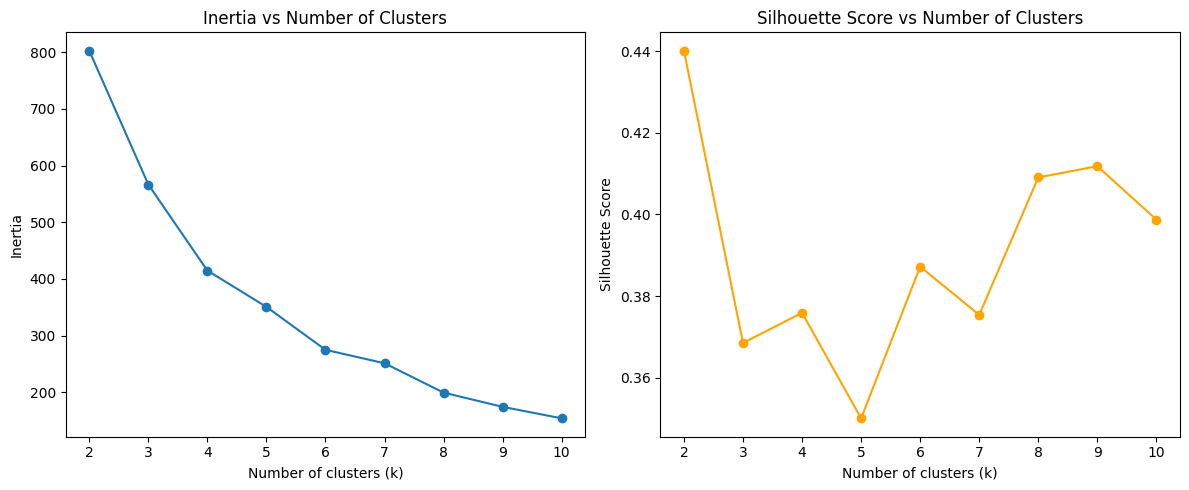

In [37]:
# 绘制 inertia 和 silhouette 分数
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(klist, inertias, marker='o')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(klist, silhouettes, marker='o', color='orange')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

***No clear elbow***

Best number of clusters (k') based on silhouette score: 2


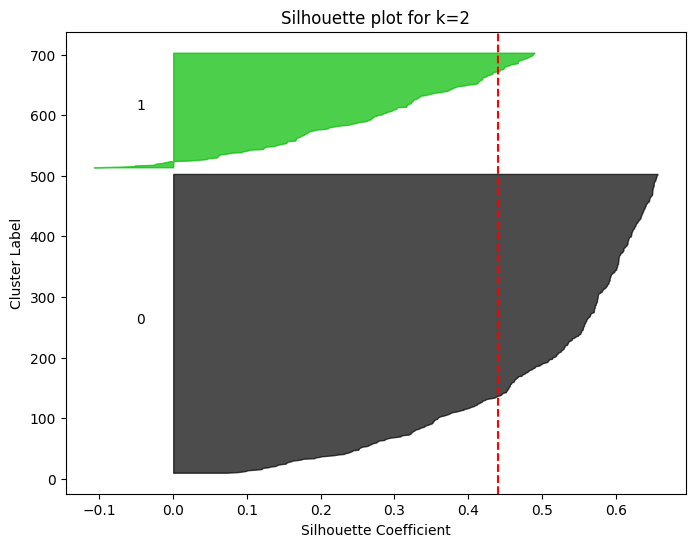

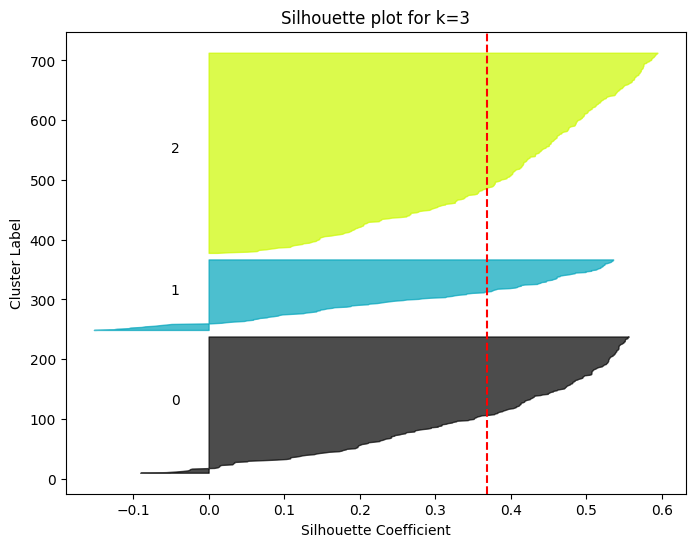

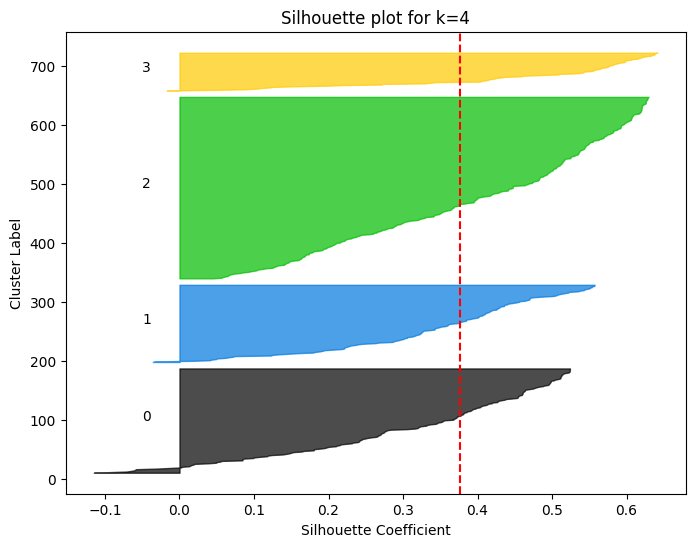

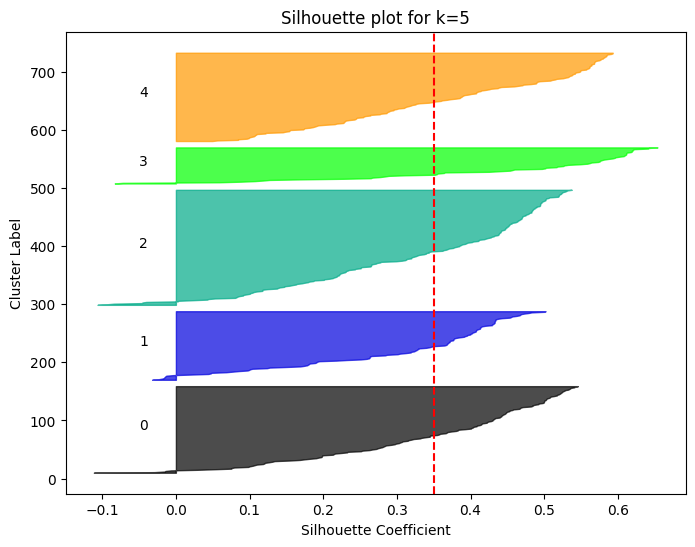

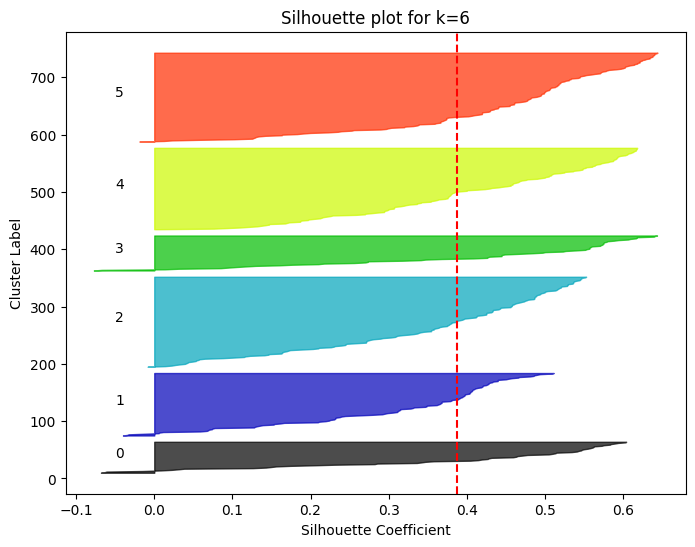

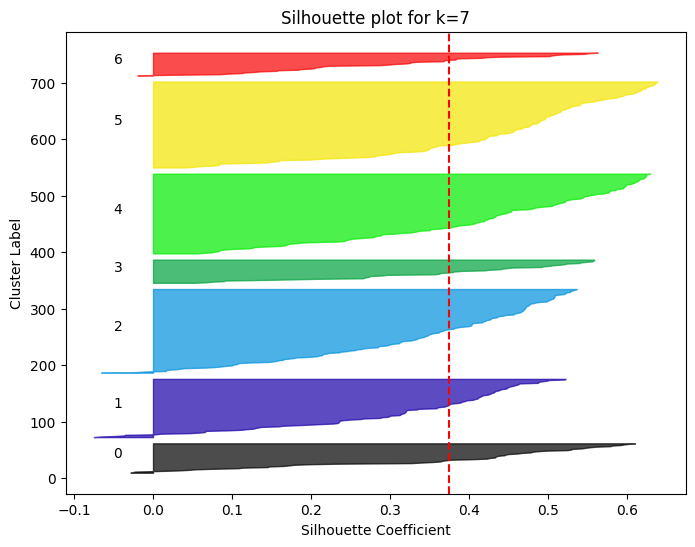

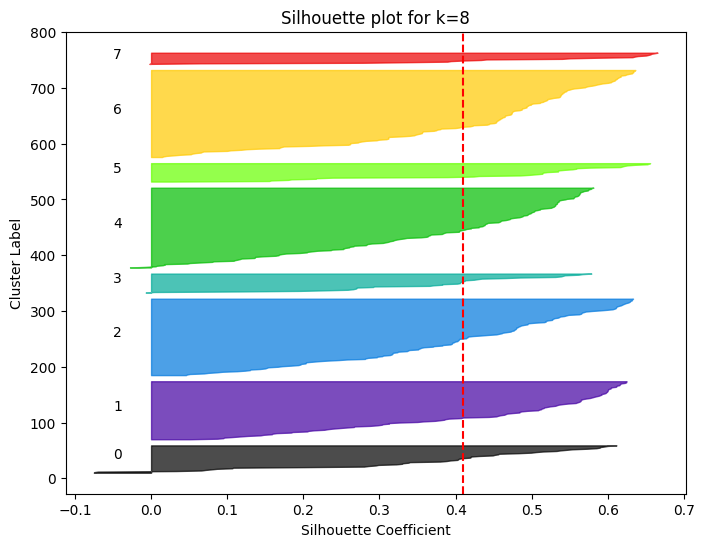

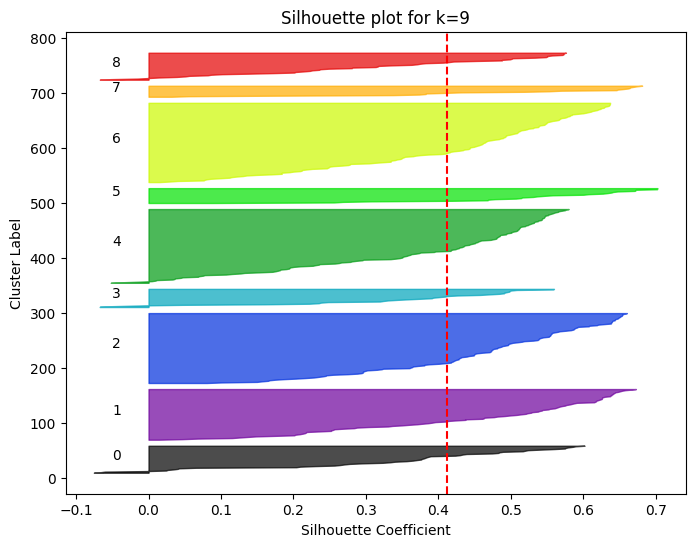

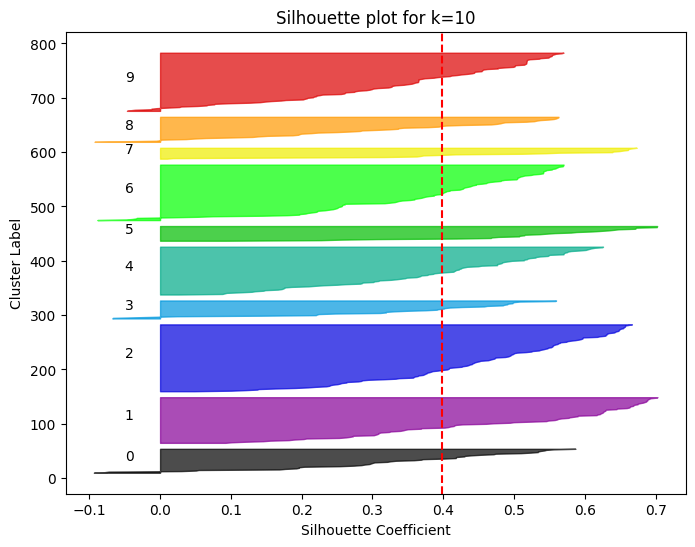

In [38]:
# select the best k through max silhouette score 
k_best = klist[np.argmax(silhouettes)]
print(f"Best number of clusters (k') based on silhouette score: {k_best}")

def plot_silhouette(X, n_clusters, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_vals = silhouette_samples(X, labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_vals[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for spacing between plots
    ax.set_title(title)
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=silhouette_score(X, labels), color="red", linestyle="--")
    plt.show()

for k in klist:
    plot_silhouette(train_set, k, f"Silhouette plot for k={k}")

***I will choose k=2*** because it has the best silhouette score. when k = 9(another example I choose to compare) there are many negative silhouette scores implying some samples are possibly in wrong cluster

## (b) [3 marks]

Report the centroid of the regimes in (a). For the training set, plot the inflation rate (x-axis) vs unemployment rate (y-axis) after these features have been standardized, and show the regimes and centroids in the plot. For the test set, plot time series of the inflation rate and unemployment rate (the original series before standardization), and show the regimes on the plot. The regimes can be shown using time series (line graphs) of the centroid for each of two series for instance, and the following code can be used, where `best_mod_pred` is the prediction on the test set from the best model.

In [39]:
# regimes_train = pd.DataFrame(data_test.iloc[:,1]).assign(
#     regime = clusters[best_mod_pred][:,1].flatten()
# )
# 
# plt.figure(figsize=(12,6))
# plt.plot(regimes_train["UNRATE"], label="vol", alpha=.3)
# plt.plot(regimes_train["regime"], '-k', label="regime")

**[Add your solution here]**

In [40]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("unemployment rate")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("inflation rate", rotation=0)
    else:
        plt.tick_params(labelleft=False)

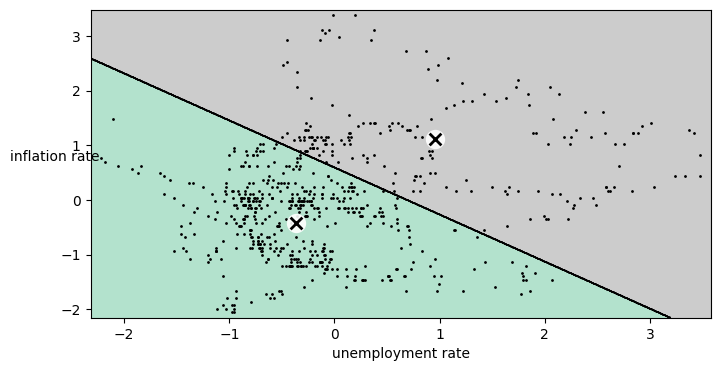

In [41]:
# plot train set
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(train_set)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, train_set)
plt.show()


In [42]:
kmeans.cluster_centers_ # centroids in (a)

array([[-0.36765273, -0.42731552],
       [ 0.95589711,  1.11102035]])

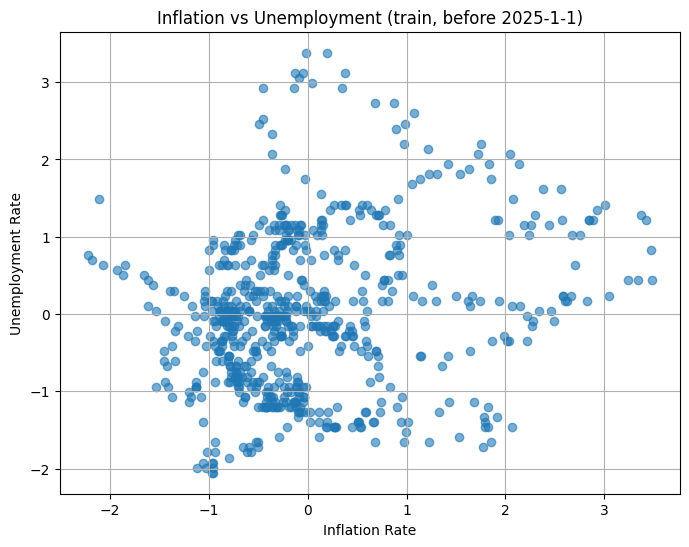

In [43]:
x = train_set[:,0] # inflation rate
y = train_set[:,1] # unemployment rate

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6)
plt.xlabel("Inflation Rate")
plt.ylabel("Unemployment Rate")
plt.title("Inflation vs Unemployment (train, before 2025-1-1)")
plt.grid(True)
plt.show()

# essentially the same plot as previous, but just want to replot it for better visualization

In [44]:
# for test set
test_set_std = std.transform(test_set)

kmeans = KMeans(n_clusters=2, random_state=42) # here I choose k=2
kmeans.fit(train_set)
clusters = kmeans.cluster_centers_
clusters = std.inverse_transform(clusters)
best_mod_pred = kmeans.predict(test_set_std)

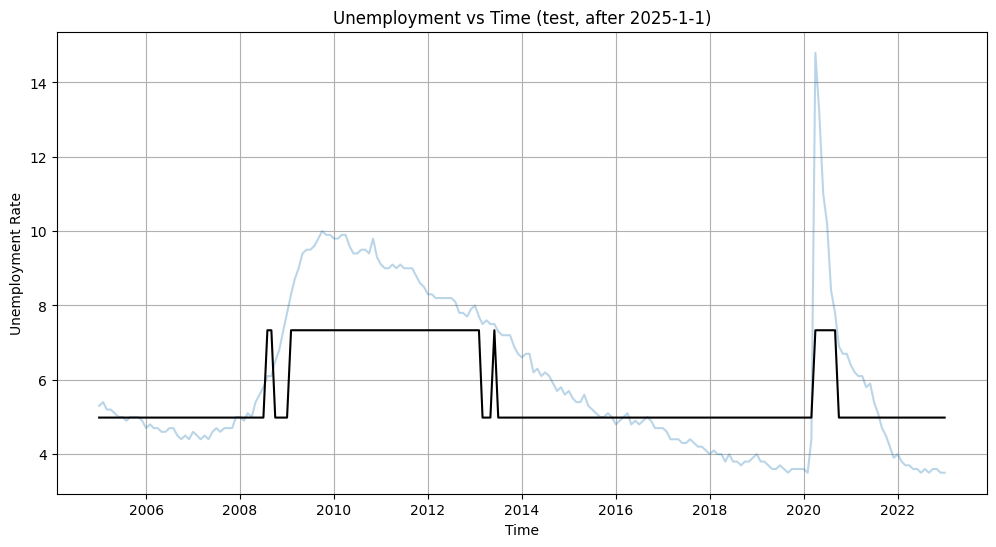

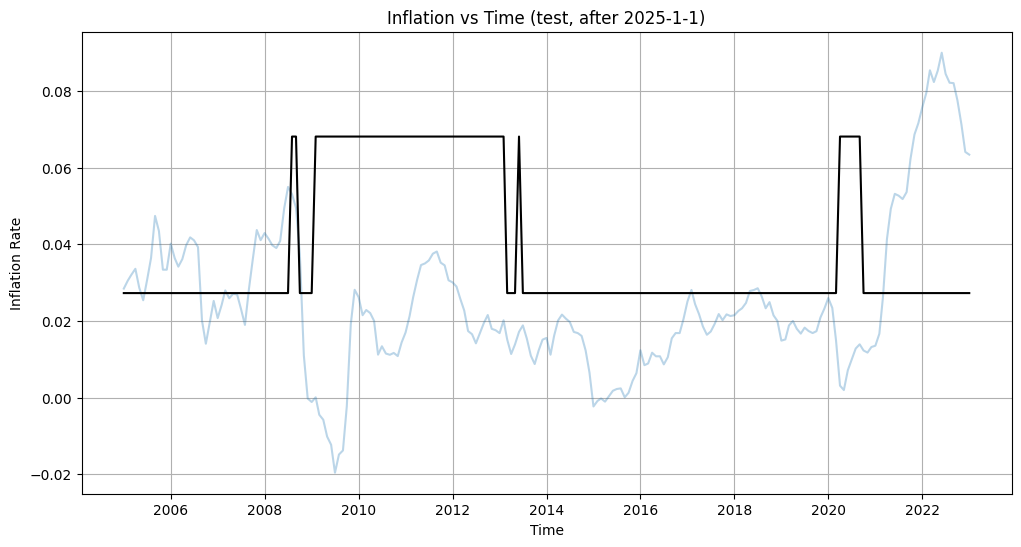

In [45]:
regimes_test = pd.DataFrame(test_set).assign(
    regime_inft = clusters[best_mod_pred][:,0].flatten(),
    regime_unemp = clusters[best_mod_pred][:,1].flatten()
)

# unemployment rate
plt.figure(figsize=(12,6))
plt.plot(regimes_test["UNRATE"], label="vol", alpha=.3)
plt.plot(regimes_test["regime_unemp"], '-k', label="regime")
plt.xlabel("Time")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment vs Time (test, after 2025-1-1)")
plt.grid(True)
plt.show()


# inflation rate
plt.figure(figsize=(12,6))
plt.plot(regimes_test["CPIAUCSL"], label="vol", alpha=.3)
plt.plot(regimes_test["regime_inft"], '-k', label="regime")
plt.xlabel("Time")
plt.ylabel("Inflation Rate")
plt.title("Inflation vs Time (test, after 2025-1-1)")
plt.grid(True)
plt.show()

## (c) [3 marks]

A regime-switching model is a probabilistic model that governs how regime transitions take place. A very simple regime-switching model is a Markov chain. Here, we assume that the next month's regime depends on the current regime. In other words, all we need to know are the **transition probabilities** $p_{i,j} = \mathbb{P}(X_{t+1}=j|X_t=i)$, where $X_t$ is the regime at day $t$. Using the time series of regimes in the training set that you found in (b), estimate these transition probabilities, as follows:
\begin{align*}
    p_{i,j} = \frac{\mathbb{P}(X_{t+1}=j \text{ and } X_t=i)}{\mathbb{P}(X_t=i)}\approx \frac{\text{number of transition from regime $i$ to $j$}}{\text{number of transition from regime $i$}}
\end{align*}
Next, let us check how good your regime switching model is. Calculate the transition probabilities using the test set. Do not retrain your k-means clusterer, simply use it to predict the regimes of the test set. Then, repeat the estimation of the transition probabilities on the test set.

Note: Depending on your choice of $k$, it is possible that some $p_{i,j}$ cannot be estimated due to  having no transitions from regime $i$.

**[Add your solution here]**

In [46]:
best_kmeans = KMeans(n_clusters=2, random_state=42)
best_mod_pred_train = best_kmeans.fit_predict(train_set) # this tran set is already standardized

k = best_kmeans.n_clusters
transition_matrix = np.zeros((k, k))
for t in range(len(best_mod_pred_train) - 1):
    i = best_mod_pred_train[t]
    j = best_mod_pred_train[t + 1]
    transition_matrix[i, j] += 1 # count the number of transitions
    
# 每一行归一化为概率
row_sums = transition_matrix.sum(axis=1, keepdims=True)
transition_probabilities_train = np.divide(
    transition_matrix, row_sums,
    out=np.zeros_like(transition_matrix)
)

transition_probabilities_train # the train prob

array([[0.99188641, 0.00811359],
       [0.02105263, 0.97894737]])

In [47]:
best_mod_pred_test = best_kmeans.predict(test_set_std)
k = best_kmeans.n_clusters
transition_matrix = np.zeros((k, k))
for t in range(len(best_mod_pred_test) - 1):
    i = best_mod_pred_test[t]
    j = best_mod_pred_test[t + 1]
    transition_matrix[i, j] += 1 # count the number of transitions
    
# 每一行归一化为概率
row_sums = transition_matrix.sum(axis=1, keepdims=True)
transition_probabilities_test = np.divide(
    transition_matrix, row_sums,
    out=np.zeros_like(transition_matrix)
)

transition_probabilities_test # the test prob

array([[0.97468354, 0.02531646],
       [0.06896552, 0.93103448]])

# 5. Optional exercise: Neural Networks

There is nothing to submit for this exercise. However, it is strongly recommended that you spend time going through this exercise.

Visit the TensorFlow Playground at [https://playground.tensorflow.org/](https://playground.tensorflow.org/)

## (a)
**Layers and patterns:** Try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns. In general, the more layers, the more complex the patterns can be.

## (b)
**Activation function:** Try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. This is due to the shape of the ReLU function.

Try, also, the sigmoid (i.e. the logistic) activation function. Note that it will take significantly more time for the ANN to properly classify the dataset (you should wait until around 900 epochs).

## (c)

**Local minima:** Modify the network architecture to have just one hidden layer with three neurons and the ReLU activation function. Train it multiple times. Between each training, press the reset button next to the play button on the top left. Notice that the training time and the shape of the decision borders varies a lot. If you are patient enough, you will notice that sometimes the network gets stuck in a local minimum which does not properly separate the classes (this happens at random).

## (d)

**Not enough neurons:** Next, remove one neuron so that you have only one hidden layer with 2 neurons. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. The model has too few parameters and it systematically underfits the training set.

## (e)
**Enough neurons:** Next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. This highlights an important finding in neural network theory: large neural networks almost never get stuck at local optima, and even when they do these local optima are almost as good as the global optimum. However, they can still get stuck on long plateaus for a long time.

## (f)

**DNNs and vanishing gradients:** Now change the dataset to be the spiral (bottom right dataset under “DATA”). Change the network architecture to have 4 hidden layers with 8 neurons each. Notice that training takes much longer, and often gets stuck on plateaus for long periods of time. Also notice that the neurons in the highest layers (i.e. on the right) tend to evolve faster than the neurons in the lowest layers (i.e. on the left). This problem, called the “vanishing gradients” problem, can be alleviated using better weight initialization and other techniques, better optimizers (such as AdaGrad or Adam), or using Batch Normalization.